## 1. import Libraries

In [34]:
!pip uninstall feature-engine -y


In [1]:
import feature_engine

In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
    PowerTransformer,
    FunctionTransformer
)
from sklearn.pipeline import Pipeline,FeatureUnion

from feature_engine.encoding import (
    RareLabelEncoder,
    MeanEncoder,
    CountFrequencyEncoder
)

In [4]:
import matplotlib.pyplot as plt

In [16]:

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator,TransformerMixin

from sklearn.compose import ColumnTransformer


import feature_engine
from feature_engine.outliers import Winsorizer
from feature_engine.selection import SelectBySingleFeaturePerformance

from feature_engine.datetime import DatetimeFeatures



### 2. Display Settings

In [5]:
pd.set_option("display.max_columns",None)

In [6]:
sklearn.set_config(transform_output="pandas")

In [7]:
import warnings
warnings.filterwarnings("ignore")

## 3. Read The Data

In [8]:
path=r"C:\Users\sneha\OneDrive\Desktop\flight-sagemake-project\data\train.csv"
train=pd.read_csv(path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included,4995
1,Air India,2019-05-18,Delhi,Cochin,09:00:00,07:40:00,1360,1.0,No Info,8372
2,Air India,2019-06-12,Kolkata,Banglore,09:10:00,11:05:00,1555,2.0,No Info,6117
3,Vistara,2019-04-01,Kolkata,Banglore,20:20:00,22:55:00,1595,1.0,No Info,7770
4,Vistara,2019-06-06,Kolkata,Banglore,17:00:00,10:45:00,1065,1.0,No Info,9187
...,...,...,...,...,...,...,...,...,...,...
635,Air Asia,2019-04-12,Banglore,Delhi,04:55:00,07:45:00,170,0.0,No Info,4282
636,Jet Airways,2019-05-09,Kolkata,Banglore,09:35:00,21:05:00,690,1.0,No Info,13067
637,Indigo,2019-05-15,Banglore,Delhi,06:05:00,08:50:00,165,0.0,No Info,4423
638,Multiple Carriers,2019-05-15,Delhi,Cochin,08:45:00,21:00:00,735,1.0,No Info,7670


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          640 non-null    object 
 1   date_of_journey  640 non-null    object 
 2   source           640 non-null    object 
 3   destination      640 non-null    object 
 4   dep_time         640 non-null    object 
 5   arrival_time     640 non-null    object 
 6   duration         640 non-null    int64  
 7   total_stops      640 non-null    float64
 8   additional_info  640 non-null    object 
 9   price            640 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 50.1+ KB


In [10]:
X_train=train.drop(columns="price")
y_train=train.price.copy()

## 4. Transformation Operations

### 4.1 Airline

In [11]:
X_train.airline

0            Jet Airways
1              Air India
2              Air India
3                Vistara
4                Vistara
             ...        
635             Air Asia
636          Jet Airways
637               Indigo
638    Multiple Carriers
639          Jet Airways
Name: airline, Length: 640, dtype: object

In [3]:
print(pd.__version__)
print(feature_engine.__version__)

2.2.2
1.9.3


In [1]:
conda install pandas=2.2.2

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/noarch/current_repodata.json HTTP/1.1" 304 0
DE

In [15]:
pip install -U feature-engine

Note: you may need to restart the kernel to use updated packages.


In [12]:
X_train["airline"] = X_train["airline"].astype("object")

In [13]:
air_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("grouper",RareLabelEncoder(tol=0.1,replace_with="Other",n_categories=2)),
    ("encoder",OneHotEncoder(sparse_output=False,handle_unknown="ignore"))
])
air_transformer.fit_transform(X_train.loc[:,["airline"]])


,airline_Air India,airline_Indigo,airline_Jet Airways,airline_Multiple Carriers,airline_Other
0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
635,0.0,0.0,0.0,0.0,1.0
636,0.0,0.0,1.0,0.0,0.0
637,0.0,1.0,0.0,0.0,0.0
638,0.0,0.0,0.0,1.0,0.0


## 4.2 date_of_journey

In [14]:
X_train.date_of_journey

0      2019-06-21
1      2019-05-18
2      2019-06-12
3      2019-04-01
4      2019-06-06
          ...    
635    2019-04-12
636    2019-05-09
637    2019-05-15
638    2019-05-15
639    2019-05-21
Name: date_of_journey, Length: 640, dtype: object

In [17]:
feature_to_extract=["month","week","day_of_week","day_of_month","day_of_year"]
doj_transformer=Pipeline(steps=[
    ("dt",DatetimeFeatures(features_to_extract=feature_to_extract,yearfirst=True,format="mixed")),
    ("scaler",MinMaxScaler())
])

doj_transformer.fit_transform(X_train.loc[:,["date_of_journey"]])


,date_of_journey_month,date_of_journey_week,date_of_journey_day_of_week,date_of_journey_day_of_month,date_of_journey_day_of_year
0,1.000000,0.941176,0.666667,0.769231,0.949153
1,0.666667,0.647059,0.833333,0.653846,0.661017
2,1.000000,0.882353,0.333333,0.423077,0.872881
3,0.333333,0.294118,0.000000,0.000000,0.262712
4,1.000000,0.823529,0.500000,0.192308,0.822034
...,...,...,...,...,...
635,0.333333,0.352941,0.666667,0.423077,0.355932
636,0.666667,0.588235,0.500000,0.307692,0.584746
637,0.666667,0.647059,0.333333,0.538462,0.635593
638,0.666667,0.647059,0.333333,0.538462,0.635593


## 4.3 Source& Destination

In [18]:
X_train.source

0        Mumbai
1         Delhi
2       Kolkata
3       Kolkata
4       Kolkata
         ...   
635    Banglore
636     Kolkata
637    Banglore
638       Delhi
639     Kolkata
Name: source, Length: 640, dtype: object

In [19]:
X_train.destination

0      Hyderabad
1         Cochin
2       Banglore
3       Banglore
4       Banglore
         ...    
635        Delhi
636     Banglore
637        Delhi
638       Cochin
639     Banglore
Name: destination, Length: 640, dtype: object

In [20]:
location_subset=X_train.loc[:,["source","destination"]]
location_subset

,source,destination
0,Mumbai,Hyderabad
1,Delhi,Cochin
2,Kolkata,Banglore
3,Kolkata,Banglore
4,Kolkata,Banglore
...,...,...
635,Banglore,Delhi
636,Kolkata,Banglore
637,Banglore,Delhi
638,Delhi,Cochin


In [21]:
location_pipe1=Pipeline(steps=[
    ("grouper",RareLabelEncoder(tol=0.1,replace_with="Others",n_categories=2)),
    ("encoder",MeanEncoder()),
    ("scaler",PowerTransformer())
])
location_pipe1.fit_transform(location_subset,y_train)

,source,destination
0,-1.855189,-0.904387
1,1.010384,1.009569
2,0.001513,-0.024692
3,0.001513,-0.024692
4,0.001513,-0.024692
...,...,...
635,-1.066757,-1.786597
636,0.001513,-0.024692
637,-1.066757,-1.786597
638,1.010384,1.009569


In [22]:
np.union1d(
    X_train.source.unique(),
    X_train.destination.unique()
)

array(['Banglore', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'Mumbai', 'New Delhi'], dtype=object)

In [23]:
def is_north(X):
    columns=X.columns.to_list()
    north_cities=["Delhi","kolkata","Mumbai","new Delhi"]
    return(
        X
        .assign(**{
            f"{col}_is_north": X.loc[:,col].isin(north_cities).astype(int)
            for col in columns
        })
        .drop(columns=columns)
    )

FunctionTransformer(func=is_north).fit_transform(location_subset)

,source_is_north,destination_is_north
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
635,0,1
636,0,0
637,0,1
638,1,0


In [24]:
location_transformer=FeatureUnion(transformer_list=[
    ("part1",location_pipe1),
    ("part2",FunctionTransformer(func=is_north))
])
location_transformer.fit_transform(location_subset,y_train)

,source,destination,source_is_north,destination_is_north
0,-1.855189,-0.904387,1,0
1,1.010384,1.009569,1,0
2,0.001513,-0.024692,0,0
3,0.001513,-0.024692,0,0
4,0.001513,-0.024692,0,0
...,...,...,...,...
635,-1.066757,-1.786597,0,1
636,0.001513,-0.024692,0,0
637,-1.066757,-1.786597,0,1
638,1.010384,1.009569,1,0


## 4.4 dep_time & Arr_time

In [25]:
X_train.dep_time

0      10:20:00
1      09:00:00
2      09:10:00
3      20:20:00
4      17:00:00
         ...   
635    04:55:00
636    09:35:00
637    06:05:00
638    08:45:00
639    20:00:00
Name: dep_time, Length: 640, dtype: object

In [26]:
X_train.arrival_time

0      11:50:00
1      07:40:00
2      11:05:00
3      22:55:00
4      10:45:00
         ...   
635    07:45:00
636    21:05:00
637    08:50:00
638    21:00:00
639    12:00:00
Name: arrival_time, Length: 640, dtype: object

In [27]:
time_subset=X_train.loc[:,["dep_time","arrival_time"]]
time_subset

,dep_time,arrival_time
0,10:20:00,11:50:00
1,09:00:00,07:40:00
2,09:10:00,11:05:00
3,20:20:00,22:55:00
4,17:00:00,10:45:00
...,...,...
635,04:55:00,07:45:00
636,09:35:00,21:05:00
637,06:05:00,08:50:00
638,08:45:00,21:00:00


In [28]:
time_pipe1=Pipeline(steps=[
    ("dt",DatetimeFeatures(features_to_extract=["hour","minute"])),
    ("scaler",MinMaxScaler())
])
time_pipe1.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,0.434783,0.363636,0.478261,0.909091
1,0.391304,0.000000,0.304348,0.727273
2,0.391304,0.181818,0.478261,0.090909
3,0.869565,0.363636,0.956522,1.000000
4,0.739130,0.000000,0.434783,0.818182
...,...,...,...,...
635,0.173913,1.000000,0.304348,0.818182
636,0.391304,0.636364,0.913043,0.090909
637,0.260870,0.090909,0.347826,0.909091
638,0.347826,0.818182,0.913043,0.000000


In [29]:
def part_of_day(X,morning=4,noon=12,evening=16,night=20):
    columns=X.columns.to_list()
    X_temp=X.assign(**{
        col:pd.to_datetime(X.loc[:,col]).dt.hour
        for col in columns
    })
    return(
        X_temp
        .assign(**{
            f"{col}_part_of_day":np.select(
                [X_temp.loc[:,col].between(morning,noon,inclusive="left"),
                X_temp.loc[:,col].between(noon,evening,inclusive="left"),
                X_temp.loc[:,col].between(evening,night,inclusive="left")],
                ["morning",'afternoon',"evening"],
                default="night"
            )
            for col in columns
        })
        .drop(columns=columns)
    )

FunctionTransformer(func=part_of_day).fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,morning,morning
1,morning,morning
2,morning,morning
3,night,night
4,evening,morning
...,...,...
635,morning,morning
636,morning,night
637,morning,morning
638,morning,night


In [30]:
time_pipe2=Pipeline(steps=[
    ("part",FunctionTransformer(func=part_of_day)),
    ("encoder",CountFrequencyEncoder()),
    ("scaler",MinMaxScaler())
])
time_pipe2.fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,1.000000,0.932584
1,1.000000,0.932584
2,1.000000,0.932584
3,0.135747,1.000000
4,0.185520,0.932584
...,...,...
635,1.000000,0.932584
636,1.000000,1.000000
637,1.000000,0.932584
638,1.000000,1.000000


In [31]:
time_transformer=FeatureUnion(transformer_list=[
    ("part1",time_pipe1),
    ("part2",time_pipe2)
])
time_transformer.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,dep_time_part_of_day,arrival_time_part_of_day
0,0.434783,0.363636,0.478261,0.909091,1.000000,0.932584
1,0.391304,0.000000,0.304348,0.727273,1.000000,0.932584
2,0.391304,0.181818,0.478261,0.090909,1.000000,0.932584
3,0.869565,0.363636,0.956522,1.000000,0.135747,1.000000
4,0.739130,0.000000,0.434783,0.818182,0.185520,0.932584
...,...,...,...,...,...,...
635,0.173913,1.000000,0.304348,0.818182,1.000000,0.932584
636,0.391304,0.636364,0.913043,0.090909,1.000000,1.000000
637,0.260870,0.090909,0.347826,0.909091,1.000000,0.932584
638,0.347826,0.818182,0.913043,0.000000,1.000000,1.000000


### 4.5 Duration

In [32]:
X_train.duration

0        90
1      1360
2      1555
3      1595
4      1065
       ... 
635     170
636     690
637     165
638     735
639     960
Name: duration, Length: 640, dtype: int64

In [33]:
(
    X_train
    .duration
    .quantile([0.25,0.50,0.75])
    .values
    .reshape(-1,1)
    #.shape
)


array([[175.  ],
       [505.  ],
       [956.25]])

In [34]:
class RBFPercentileSimilarity(BaseEstimator,TransformerMixin):
    def __init__(self,variables=None,percentiles=[0.25,0.50,0.75],gamma=0.1):
        self.variables=variables
        self.percentiles=percentiles
        self.gamma=gamma

    def fit(self,X,y=None):
        if not self.variables:
            self.variables=X.select_dtypes(include="number").columns.to_list()

        self.reference_values_ ={
            col:(
                X
                .loc[:,col]
                .quantile(self.percentiles)
                .values
                .reshape(-1,1)
            )
            for col in self.variables
            
        }

        return self

    def transform(self,X):
        objects=[]
        for col in self.variables:
            columns=[f"{col}_rbf_{int(percentile*100)}" for percentile in self.percentiles]
            obj=pd.DataFrame(
                data=rbf_kernel(X.loc[:,[col]],Y=self.reference_values_[col],gamma=self.gamma),
                columns=columns
            )
            objects.append(obj)

        return pd.concat(objects,axis=1)

In [35]:
RBFPercentileSimilarity().fit_transform(X_train.loc[:,["duration"]])

,duration_rbf_25,duration_rbf_50,duration_rbf_75
0,1.668157e-314,0.0,0.000000
1,0.000000e+00,0.0,0.000000
2,0.000000e+00,0.0,0.000000
3,0.000000e+00,0.0,0.000000
4,0.000000e+00,0.0,0.000000
...,...,...,...
635,8.208500e-02,0.0,0.000000
636,0.000000e+00,0.0,0.000000
637,4.539993e-05,0.0,0.000000
638,0.000000e+00,0.0,0.000000


In [36]:
def duration_category(X,short=180,med=400):
    return(
        X
        .assign(**{
            f"duration_over_{value}":X.duration.ge(value).astype(int)
        })
        .drop(columns="duration")
    )

In [37]:
def is_over(X,value=1000):
    return(
        X
        .assign(**{
            f"duration_over_{value}":X.duration.ge(value).astype(int)
        })
        .drop(columns="duration")
    )

In [38]:
duration_pipe1=Pipeline(steps=[
    ("rbf",RBFPercentileSimilarity()),
    ("scaler",PowerTransformer())
])
duration_union=FeatureUnion(transformer_list=[
    ("part1",duration_pipe1),
    ("part2",StandardScaler())
])
duration_transformer=Pipeline(steps=[
    ("outlier",Winsorizer(capping_method="iqr",fold=1.5)),
    ("imputer",SimpleImputer(strategy="median")),
    ("union",duration_union)
])
duration_transformer.fit_transform(X_train.loc[:,["duration"]])

,duration_rbf_25,duration_rbf_50,duration_rbf_75,duration
0,-0.364072,-0.132365,-0.084531,-1.100128
1,-0.364072,-0.132365,-0.084531,1.444835
2,-0.364072,-0.132365,-0.084531,1.835597
3,-0.364072,-0.132365,-0.084531,1.915754
4,-0.364072,-0.132365,-0.084531,0.853682
...,...,...,...,...
635,2.649340,-0.132365,-0.084531,-0.939815
636,-0.364072,-0.132365,-0.084531,0.102217
637,-0.359672,-0.132365,-0.084531,-0.949835
638,-0.364072,-0.132365,-0.084531,0.192393


 ## 4.6 Total Stops

In [39]:
X_train.total_stops

0      0.0
1      1.0
2      2.0
3      1.0
4      1.0
      ... 
635    0.0
636    1.0
637    0.0
638    1.0
639    1.0
Name: total_stops, Length: 640, dtype: float64

In [40]:
def is_direct(X):
    return X.assign(is_direct_flight=X.total_stops.eq(0).astype(int))

total_stops_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("",FunctionTransformer(func=is_direct))
])
total_stops_transformer.fit_transform(X_train.loc[:,["total_stops"]])

,total_stops,is_direct_flight
0,0.0,1
1,1.0,0
2,2.0,0
3,1.0,0
4,1.0,0
...,...,...
635,0.0,1
636,1.0,0
637,0.0,1
638,1.0,0


## 4.7 additional_info

In [41]:
X_train.additional_info

0      In-flight meal not included
1                          No Info
2                          No Info
3                          No Info
4                          No Info
                  ...             
635                        No Info
636                        No Info
637                        No Info
638                        No Info
639    In-flight meal not included
Name: additional_info, Length: 640, dtype: object

In [42]:
info_pipe1=Pipeline(steps=[
    ("group",RareLabelEncoder(tol=0.1,n_categories=2,replace_with="Other")),
    ("encoder",OneHotEncoder(handle_unknown="ignore",sparse_output=False))
])

info_pipe1.fit_transform(X_train.loc[:,["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
635,0.0,1.0,0.0
636,0.0,1.0,0.0
637,0.0,1.0,0.0
638,0.0,1.0,0.0


In [43]:
def have_info(X):
    return X.assign(additional_info=X.additional_info.ne("No Info").astype(int))

In [44]:
info_union=FeatureUnion(transformer_list=[
    ("part1",info_pipe1),
    ("part2",FunctionTransformer(func=have_info))
])

In [45]:
info_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="unknown")),
    ("union",info_union)
])

info_transformer.fit_transform(X_train.loc[:,["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other,additional_info
0,1.0,0.0,0.0,1
1,0.0,1.0,0.0,0
2,0.0,1.0,0.0,0
3,0.0,1.0,0.0,0
4,0.0,1.0,0.0,0
...,...,...,...,...
635,0.0,1.0,0.0,0
636,0.0,1.0,0.0,0
637,0.0,1.0,0.0,0
638,0.0,1.0,0.0,0


## 5. Column Transformer

In [46]:
column_transformer=ColumnTransformer(transformers=[
    ("air",air_transformer,["airline"]),
    ("doj",doj_transformer,["date_of_journey"]),
    ("location",location_transformer,["source",'destination']),
    ("time",time_transformer,["dep_time","arrival_time"]),
    ("dur",duration_transformer,["duration"]),
    ("stops",total_stops_transformer,["total_stops"]),
    ("info",info_transformer,["additional_info"])
],remainder="passthrough")
column_transformer.fit_transform(X_train,y_train)

,air__airline_Air India,air__airline_Indigo,air__airline_Jet Airways,air__airline_Multiple Carriers,air__airline_Other,doj__date_of_journey_month,doj__date_of_journey_week,doj__date_of_journey_day_of_week,doj__date_of_journey_day_of_month,doj__date_of_journey_day_of_year,location__source,location__destination,location__source_is_north,location__destination_is_north,time__dep_time_hour,time__dep_time_minute,time__arrival_time_hour,time__arrival_time_minute,time__dep_time_part_of_day,time__arrival_time_part_of_day,dur__duration_rbf_25,dur__duration_rbf_50,dur__duration_rbf_75,dur__duration,stops__total_stops,stops__is_direct_flight,info__additional_info_In-flight meal not included,info__additional_info_No Info,info__additional_info_Other,info__additional_info
0,0.0,0.0,1.0,0.0,0.0,1.000000,0.941176,0.666667,0.769231,0.949153,-1.855189,-0.904387,1,0,0.434783,0.363636,0.478261,0.909091,1.000000,0.932584,-0.364072,-0.132365,-0.084531,-1.100128,0.0,1,1.0,0.0,0.0,1
1,1.0,0.0,0.0,0.0,0.0,0.666667,0.647059,0.833333,0.653846,0.661017,1.010384,1.009569,1,0,0.391304,0.000000,0.304348,0.727273,1.000000,0.932584,-0.364072,-0.132365,-0.084531,1.444835,1.0,0,0.0,1.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,1.000000,0.882353,0.333333,0.423077,0.872881,0.001513,-0.024692,0,0,0.391304,0.181818,0.478261,0.090909,1.000000,0.932584,-0.364072,-0.132365,-0.084531,1.835597,2.0,0,0.0,1.0,0.0,0
3,0.0,0.0,0.0,0.0,1.0,0.333333,0.294118,0.000000,0.000000,0.262712,0.001513,-0.024692,0,0,0.869565,0.363636,0.956522,1.000000,0.135747,1.000000,-0.364072,-0.132365,-0.084531,1.915754,1.0,0,0.0,1.0,0.0,0
4,0.0,0.0,0.0,0.0,1.0,1.000000,0.823529,0.500000,0.192308,0.822034,0.001513,-0.024692,0,0,0.739130,0.000000,0.434783,0.818182,0.185520,0.932584,-0.364072,-0.132365,-0.084531,0.853682,1.0,0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,0.0,0.0,0.0,1.0,0.333333,0.352941,0.666667,0.423077,0.355932,-1.066757,-1.786597,0,1,0.173913,1.000000,0.304348,0.818182,1.000000,0.932584,2.649340,-0.132365,-0.084531,-0.939815,0.0,1,0.0,1.0,0.0,0
636,0.0,0.0,1.0,0.0,0.0,0.666667,0.588235,0.500000,0.307692,0.584746,0.001513,-0.024692,0,0,0.391304,0.636364,0.913043,0.090909,1.000000,1.000000,-0.364072,-0.132365,-0.084531,0.102217,1.0,0,0.0,1.0,0.0,0
637,0.0,1.0,0.0,0.0,0.0,0.666667,0.647059,0.333333,0.538462,0.635593,-1.066757,-1.786597,0,1,0.260870,0.090909,0.347826,0.909091,1.000000,0.932584,-0.359672,-0.132365,-0.084531,-0.949835,0.0,1,0.0,1.0,0.0,0
638,0.0,0.0,0.0,1.0,0.0,0.666667,0.647059,0.333333,0.538462,0.635593,1.010384,1.009569,1,0,0.347826,0.818182,0.913043,0.000000,1.000000,1.000000,-0.364072,-0.132365,-0.084531,0.192393,1.0,0,0.0,1.0,0.0,0


## 6. Feature Selection

In [47]:
estimator=RandomForestRegressor(n_estimators=10,max_depth=3,random_state=42)
selector=SelectBySingleFeaturePerformance(
    estimator=estimator,
    scoring="r2",
    threshold=0.1
)

## 7. Putting all Together

In [48]:
preprocessor=Pipeline(steps=[
    ("ct",column_transformer),
    ("selector",selector)
])

preprocessor.fit_transform(X_train,y_train)

,air__airline_Indigo,air__airline_Jet Airways,air__airline_Other,doj__date_of_journey_week,doj__date_of_journey_day_of_year,location__source,location__destination,location__destination_is_north,dur__duration_rbf_25,dur__duration,stops__total_stops,stops__is_direct_flight
0,0.0,1.0,0.0,0.941176,0.949153,-1.855189,-0.904387,0,-0.364072,-1.100128,0.0,1
1,0.0,0.0,0.0,0.647059,0.661017,1.010384,1.009569,0,-0.364072,1.444835,1.0,0
2,0.0,0.0,0.0,0.882353,0.872881,0.001513,-0.024692,0,-0.364072,1.835597,2.0,0
3,0.0,0.0,1.0,0.294118,0.262712,0.001513,-0.024692,0,-0.364072,1.915754,1.0,0
4,0.0,0.0,1.0,0.823529,0.822034,0.001513,-0.024692,0,-0.364072,0.853682,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,0.0,1.0,0.352941,0.355932,-1.066757,-1.786597,1,2.649340,-0.939815,0.0,1
636,0.0,1.0,0.0,0.588235,0.584746,0.001513,-0.024692,0,-0.364072,0.102217,1.0,0
637,1.0,0.0,0.0,0.647059,0.635593,-1.066757,-1.786597,1,-0.359672,-0.949835,0.0,1
638,0.0,0.0,0.0,0.647059,0.635593,1.010384,1.009569,0,-0.364072,0.192393,1.0,0


## 8. Visualization

In [49]:
feature_performances=preprocessor.named_steps["selector"].feature_performance_
feature_performances

{'air__airline_Air India': -0.0004934775676132356,
 'air__airline_Indigo': 0.11143357665144797,
 'air__airline_Jet Airways': 0.14506076487015315,
 'air__airline_Multiple Carriers': -0.003073250116394773,
 'air__airline_Other': 0.10720239661922266,
 'doj__date_of_journey_month': 0.07587871136576778,
 'doj__date_of_journey_week': 0.17309192040384677,
 'doj__date_of_journey_day_of_week': -0.019500664285657814,
 'doj__date_of_journey_day_of_month': 0.030868189289275816,
 'doj__date_of_journey_day_of_year': 0.20504259758740517,
 'location__source': 0.14743682918716292,
 'location__destination': 0.15866333325687323,
 'location__source_is_north': 0.012924566911420854,
 'location__destination_is_north': 0.12939087087862397,
 'time__dep_time_hour': -0.022199415197866428,
 'time__dep_time_minute': 0.026288954687537263,
 'time__arrival_time_hour': 0.07200269878055865,
 'time__arrival_time_minute': 0.011447444082674988,
 'time__dep_time_part_of_day': -0.008058685914884345,
 'time__arrival_time_par

In [50]:
sorted_feat_imp=dict(sorted(feature_performances.items(),key=lambda val: val[1]))
sorted_feat_imp

{'time__dep_time_hour': -0.022199415197866428,
 'doj__date_of_journey_day_of_week': -0.019500664285657814,
 'time__dep_time_part_of_day': -0.008058685914884345,
 'air__airline_Multiple Carriers': -0.003073250116394773,
 'info__additional_info_In-flight meal not included': -0.0024378305709307213,
 'info__additional_info_No Info': -0.0013671216229749945,
 'info__additional_info': -0.0013671216229749945,
 'air__airline_Air India': -0.0004934775676132356,
 'dur__duration_rbf_75': 0.0012276347238188896,
 'dur__duration_rbf_50': 0.003240401889735215,
 'time__arrival_time_minute': 0.011447444082674988,
 'location__source_is_north': 0.012924566911420854,
 'time__arrival_time_part_of_day': 0.014250114500499103,
 'time__dep_time_minute': 0.026288954687537263,
 'info__additional_info_Other': 0.028996597914851024,
 'doj__date_of_journey_day_of_month': 0.030868189289275816,
 'time__arrival_time_hour': 0.07200269878055865,
 'doj__date_of_journey_month': 0.07587871136576778,
 'air__airline_Other': 0.

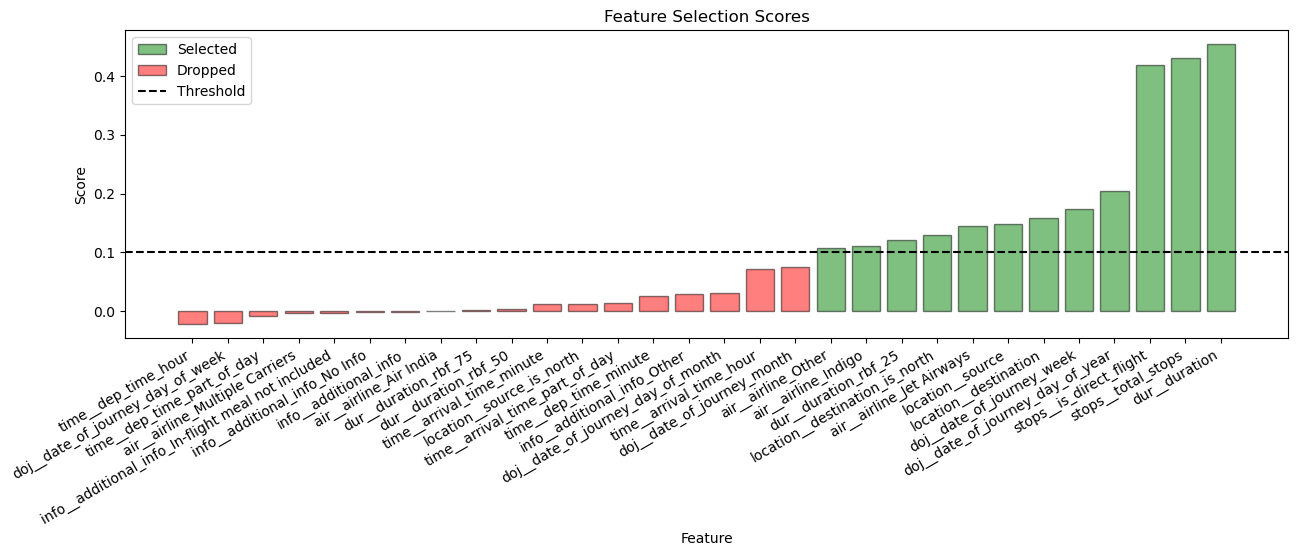

In [54]:
THRESHOLD=0.1
selected_bar=None
dropped_bar=None
colors=["red" if score< THRESHOLD else "green" for score in sorted_feat_imp.values()]

fig,ax=plt.subplots(figsize=(15,4))

for i, (feature, score) in enumerate(sorted_feat_imp.items()):
    params=dict(
        x=i,
        height=score,
        edgecolor="black",
        alpha=0.5
    )

    if score < THRESHOLD:
        bar=ax.bar(
            color="red",
            **params
        )
        if not dropped_bar:
                dropped_bar=bar[0]

    else:
            bar=ax.bar(
                color="green",
                **params
            )
            if not selected_bar:
                selected_bar=bar[0]

thresh_line=ax.axhline(
        y=0.1,
        color="black",
        linestyle="--"
)

ax.set_xticks(
    ticks=range(len(sorted_feat_imp)),
    labels=list(sorted_feat_imp.keys()),
    rotation=30,
    ha="right"
)

ax.set(
    xlabel="Feature",
    ylabel="Score",
    title="Feature Selection Scores"
)
ax.legend(
    handles=[selected_bar,dropped_bar,thresh_line],
    labels=["Selected","Dropped","Threshold"],
    loc="upper left"
)

plt.show()